In [4]:
library('rethinking')

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.7, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: cmdstanr

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan

Loading required package: parallel

rethinking (Version 2.21)


Attaching package: ‘rethinking’


The following object is masked from ‘package:rstan’:

    stan


The following object is masked from ‘package:stats’:

    rstudent




In [5]:
set.seed(100)
p_grid <- seq(from=0, to=1, length.out=1000)
prior <- rep(1, 1000)
likelihood <- dbinom(6, size = 9, prob = p_grid)
posterior <- likelihood * prior
posterior <- posterior / sum(posterior)

In [6]:
samples = sample(p_grid, prob = posterior, size = 1e4, replace=TRUE)

### 3E1.
How much posterior probability lies below p = 0.2?

In [7]:
sum(samples < 0.2)/length(samples)

[1] 4e-04

### 3E2.
How much posterior probability lies above p = 0.8?

In [8]:
sum(samples > 0.8)/length(samples)

[1] 0.1116

### 3E3.
How much posterior probability lies between p = 0.2 and p = 0.8?

In [9]:
1-sum(samples>0.8)/length(samples) - sum(samples<0.2)/length(samples)

[1] 0.888

### 3E4.
20% of the posterior probability lies below which value of p?

In [10]:
quantile(samples, 0.2)

20% 
0.5185185

### 3E5.
20% of the posterior probability lies above which value of p?

This is just the 80% quantile

In [11]:
quantile(samples, 0.8)

80% 
0.7557558

### 3E6.
Which values of p contain the narrowest interval equal to 66% of the posterior probability?

In [12]:
HPDI(samples, prob = 0.66)

|0.66     0.66| 
0.5085085 0.7737738

### 3E7.
Which values of p contain 66% of the posterior probability, assuming equal posterior probability both below and above the interval?

In [13]:
PI(samples, 0.66)

17%       83% 
0.5025025 0.7697698

### 3M1.
Suppose the globe tossing data had turned out to be 8 water in 15 tosses. Construct the posterior distribution, using grid approximation. Use the same flat prior as before

In [14]:
PosteriorCalc <- function(W, n, p_grid, prior){
    likelihood <- dbinom(W, size=n, prob=p_grid) #3 trials and 3 heads
    unstd.posterior<-likelihood*prior
    posterior <- unstd.posterior/sum(unstd.posterior)
    plot(p_grid, posterior, type = "b", xlab = "probability of water", ylab = "posterior probability")
    mtext("100 points")
    return(posterior)
    }

In [15]:
p_grid <- seq(from=0, to=1, length.out = 100)
prior <- rep(1, 100)

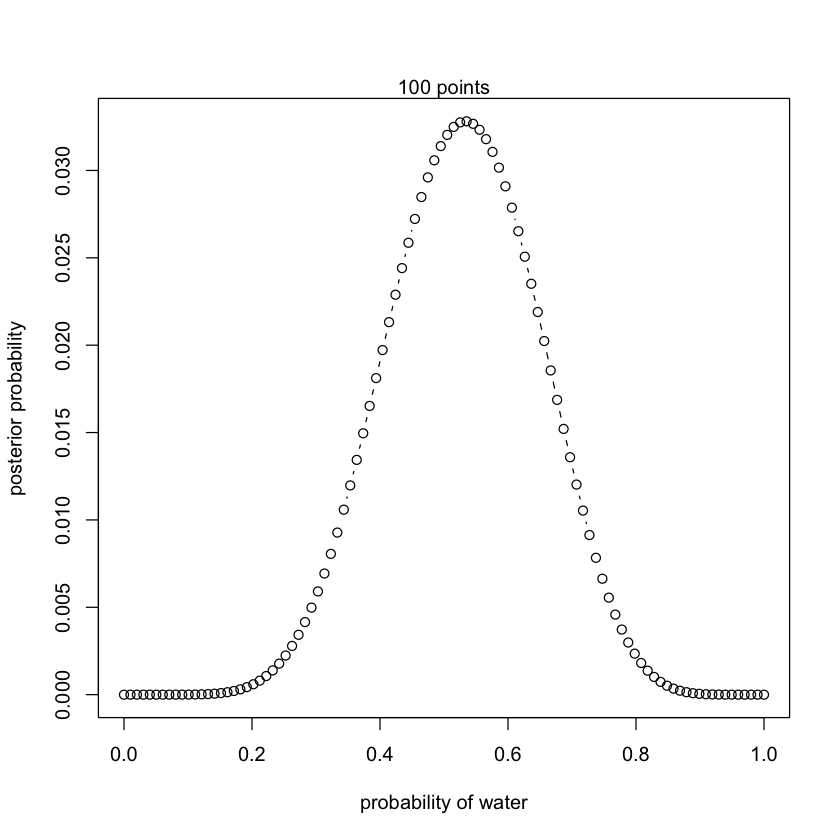

In [16]:
post = PosteriorCalc(8, 15, p_grid, prior)

### 3M2.
Draw 10,000 samples from the grid approximation from above. Then use the samples to calculate the 90% HPDI for p

In [17]:
samples = sample(p_grid, prob = post, size = 1e5, replace=TRUE)

In [18]:
HPDI(samples, 0.9)

|0.9      0.9| 
0.3434343 0.7272727

### 3M3.
Construct a posterior predictive check for this model and data. This means simulate the distribution of samples, averaging over the posterior uncertainty in p. What is the probability of observing
8 water in 15 tosses?

In [19]:
# we generate this from rbinom 

ppd <- rbinom(1e4, size=15, prob = samples)

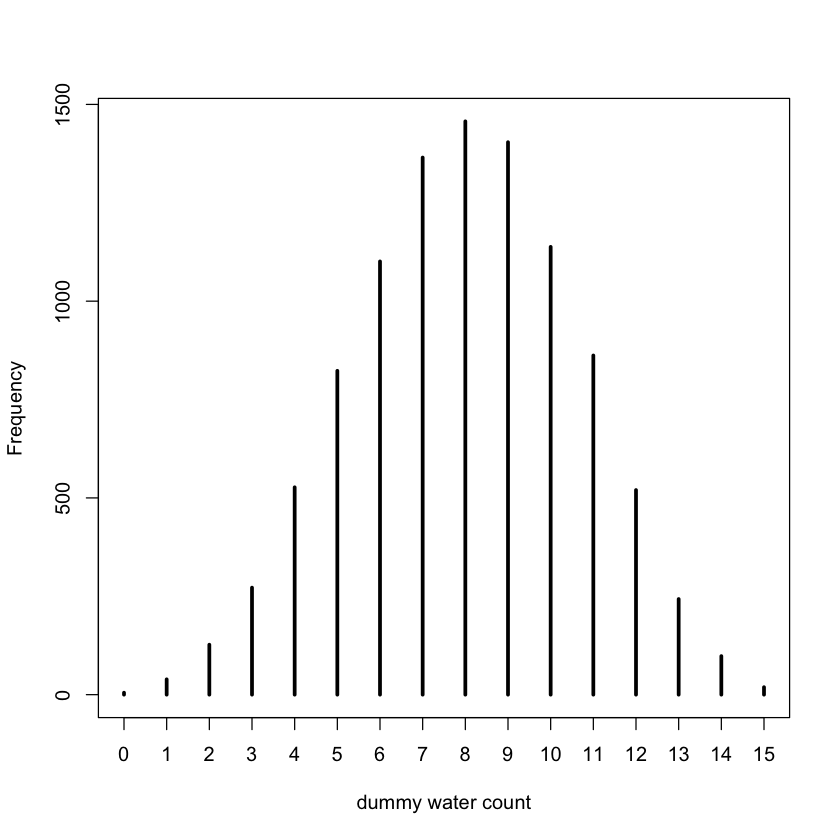

In [20]:
simplehist(ppd, xlab = 'dummy water count')

In [21]:
mean(ppd)

[1] 7.9703

In [22]:
sum(ppd==8)/length(ppd)

[1] 0.1457

prob = 0.14

### 3M4.
Using the posterior distribution constructed from the new (8/15) data, now calculate the probability of observing 6 water in 9 tosses.

In [23]:
sum(ppd==6)/length(ppd)

[1] 0.1101

### 3M5.
Start over at 3M1, but now use a prior that is zero below p = 0.5 and a constant above p = 0.5.
This corresponds to prior information that a majority of the Earth’s surface is water. Repeat each
problem above and compare the inferences. What difference does the better prior make? If it helps,
compare inferences (using both priors) to the true value p = 0.7

In [24]:
PosteriorCalc <- function(W, n, p_grid, prior){
    likelihood <- dbinom(W, size=n, prob=p_grid) #3 trials and 3 heads
    unstd.posterior<-likelihood*prior
    posterior <- unstd.posterior/sum(unstd.posterior)
    # plot(p_grid, posterior, type = "b", xlab = "probability of water", ylab = "posterior probability")
    # mtext("100 points")
    return(posterior)
    }

In [58]:
p_grid <- seq(from=0, to=1, length.out = 100)
prior <- ifelse(p_grid<0.5, 0, 0.5)

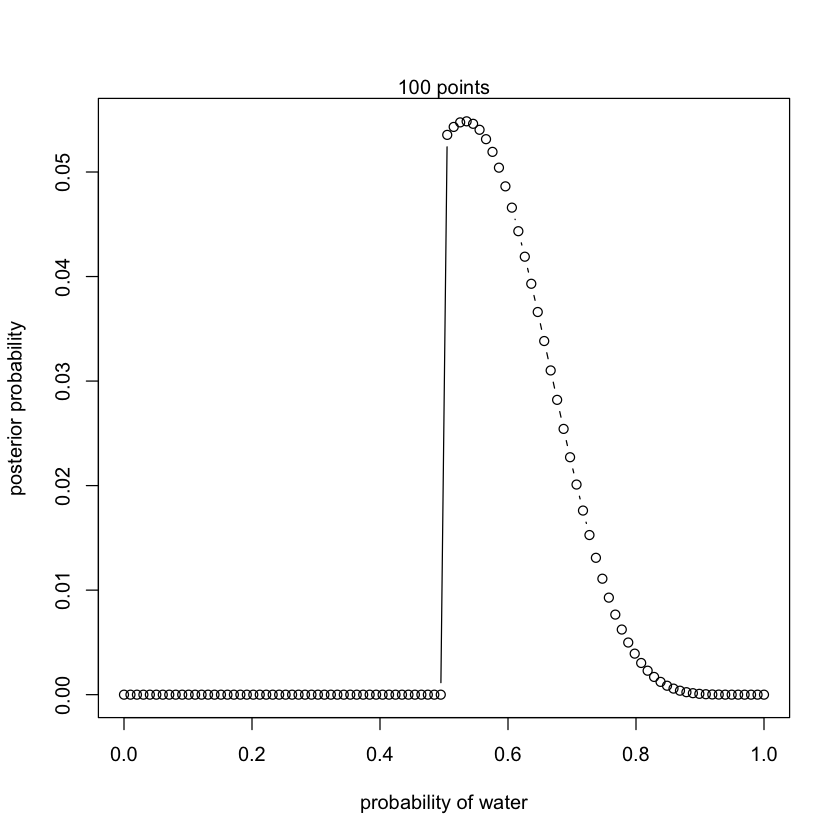

In [59]:
post = PosteriorCalc(8, 15, p_grid, prior)

In [60]:
samples_step = sample(p_grid, prob = post, size = 1e5, replace=TRUE)

In [61]:
ppd_step <- rbinom(1e4, size=15, prob = samples_step)

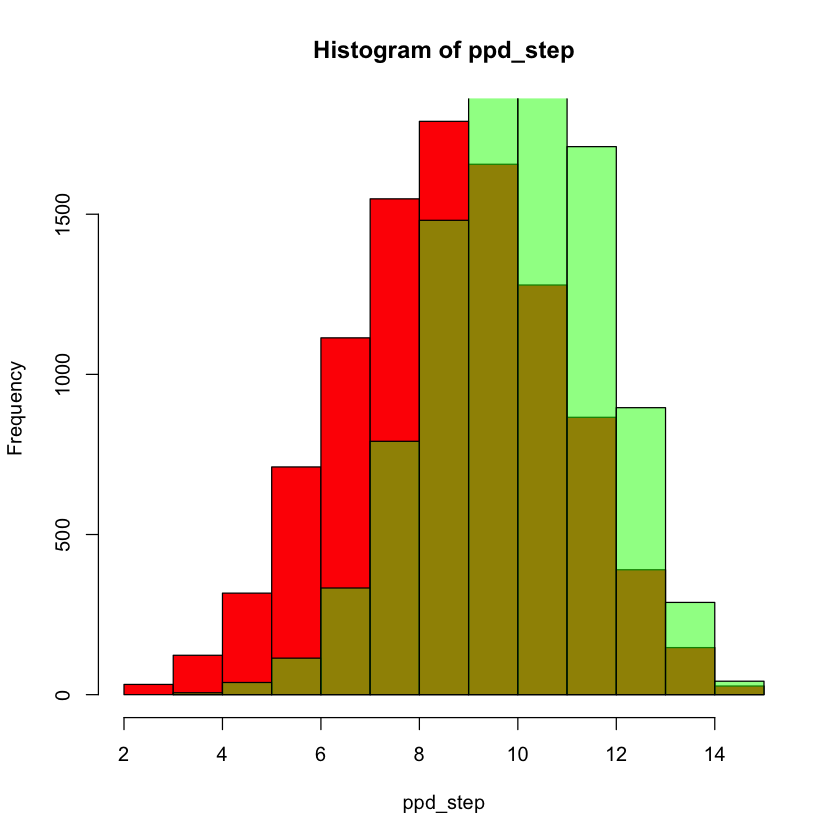

In [82]:
hist(ppd_step, col='red')
hist(rbinom(1e4, size=15, prob=0.7), add=T, col=rgb(0, 1, 0, 0.5))

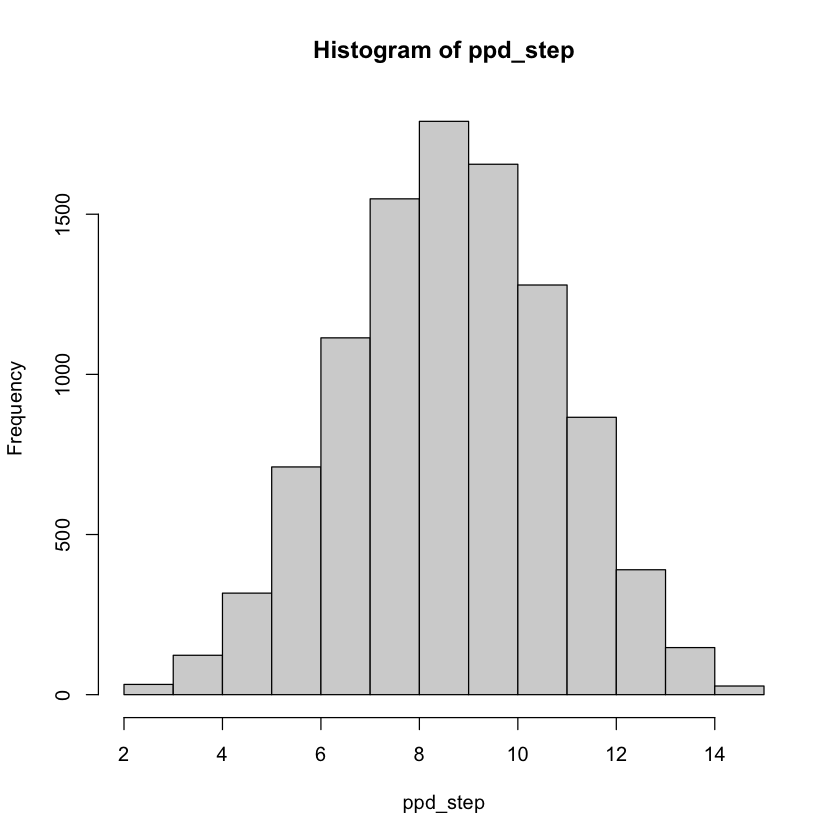

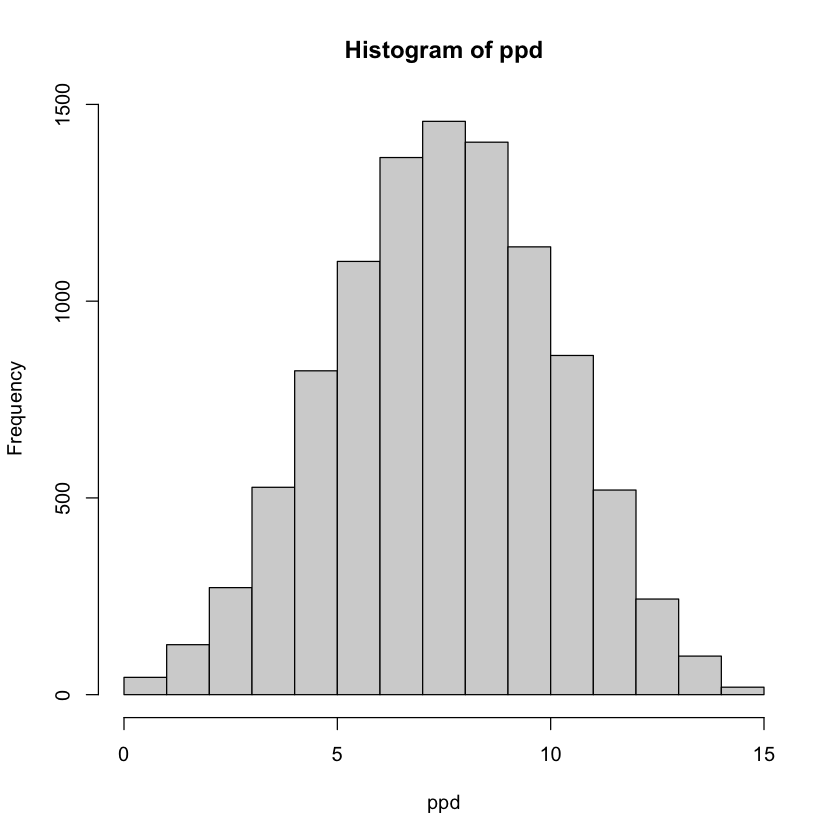

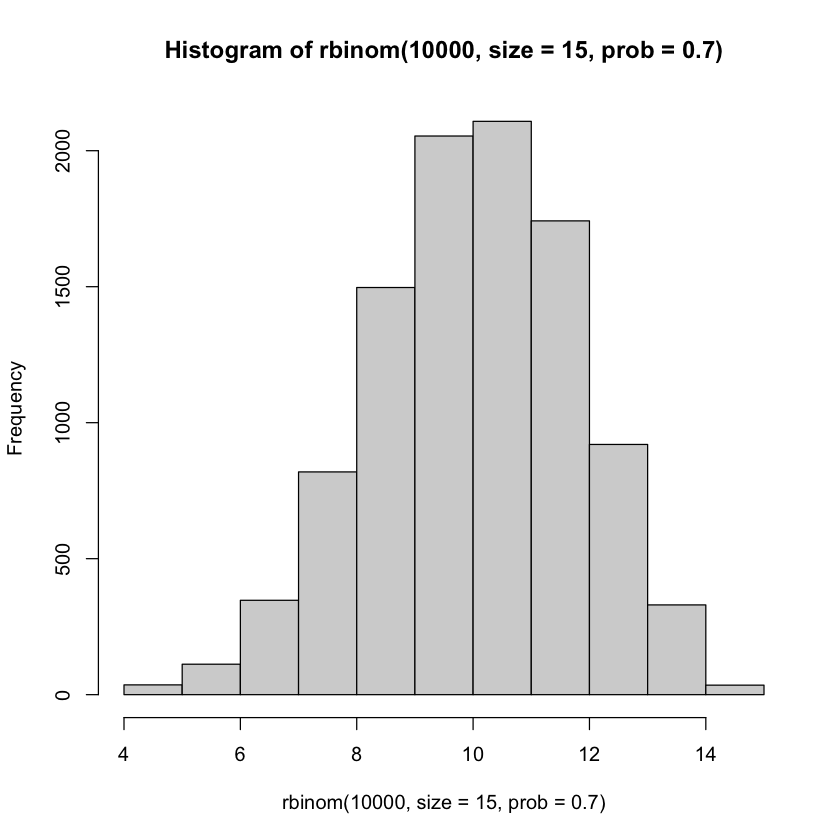

In [85]:
hist(ppd_step)
hist(ppd)
hist(rbinom(1e4, size=15, prob=0.7))

In [89]:
HPDI(samples, 0.9)# recapture the original prior

|0.9      0.9| 
0.3434343 0.7272727

In [90]:
HPDI(samples_step, 0.9)

|0.9      0.9| 
0.5050505 0.7171717

It is difficult to visualize on R, but the HPDI is narrower for the new informed prior, which is what makes its predicative power a little stronger and closer to the true values 

### 3M6.

Suppose you want to estimate the Earth’s proportion of water very precisely. Specifically, you
want the 99% percentile interval of the posterior distribution of p to be only 0.05 wide. This means
the distance between the upper and lower bound of the interval should be 0.05. How many times will
you have to toss the globe to do this?

**Answer**

we simulate the situation with different numbers of trials and try to see what's the correlation between the # of trials and the width of the interval

We know that the posterior is a beta function, so we will just use that to calculate the 99th percentile

In [120]:
num_trials<- list()

In [121]:
p <- 0.7

In [164]:
n <- 2271
w <- 1565

some tests

In [191]:
interval <- PI(rbeta(100, w+1, n-w+1), 0.99)

In [180]:
width <- unname(unlist(interval['100%'] - interval['1%']))# make this not a list

In [181]:
width

[1] 0.03853789

In [193]:
class(interval)

[1] "numeric"

In [194]:
interval

1%      100% 
0.6595724 0.7081486

In [218]:
#just do for p=0.7 for now
num_trials <- list()
p = 0.7
for (i in 1:100){
    n <- 1
    w <- 1
    interval <- PI(rbeta(100, w+1, n-w+1), 0.99)
    width <- unname(unlist(interval['100%'] - interval['1%']))# make this not a list
    while (width > 0.05) {
        w <- w+rbinom(1,1, prob = p)
        n <- n+1
        interval <- PI(rbeta(1e4, w+1, n-w+1), 0.99)
        width <- unname(unlist(interval['100%'] - interval['1%']))# make this not a list
        }
    num_trials <- append(num_trials, n)
}
        

In [219]:
mean(unlist(num_trials))

[1] 2105.25

this is very slow compared to python so we will ened here, but this approximately matches what we get from python

### Hard.
The Hard problems here all use the data below. These data indicate the gender (male=1, female=0) of officially reported first and second born children in 100 two-child families.


In [220]:
# fmt: off
birth1 <- c(1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,
1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,
1,0,1,1,1,0,1,1,1,1)
birth2 <- c(0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0)
# fmt: on

**Answer**

so we don't care about whether the birth is first or second, we treat the data as a whole

In [221]:
birth <- c(birth1, birth2)

In [222]:
sum(birth)

[1] 111

In [262]:
n_exp = 100
p_grid <- seq(from = 0, to=1, length = n_exp)
prior <- rep(1, n_exp)

In [263]:
post <- PosteriorCalc(W = sum(birth), n=length(birth), prior = prior, p_grid = p_grid)

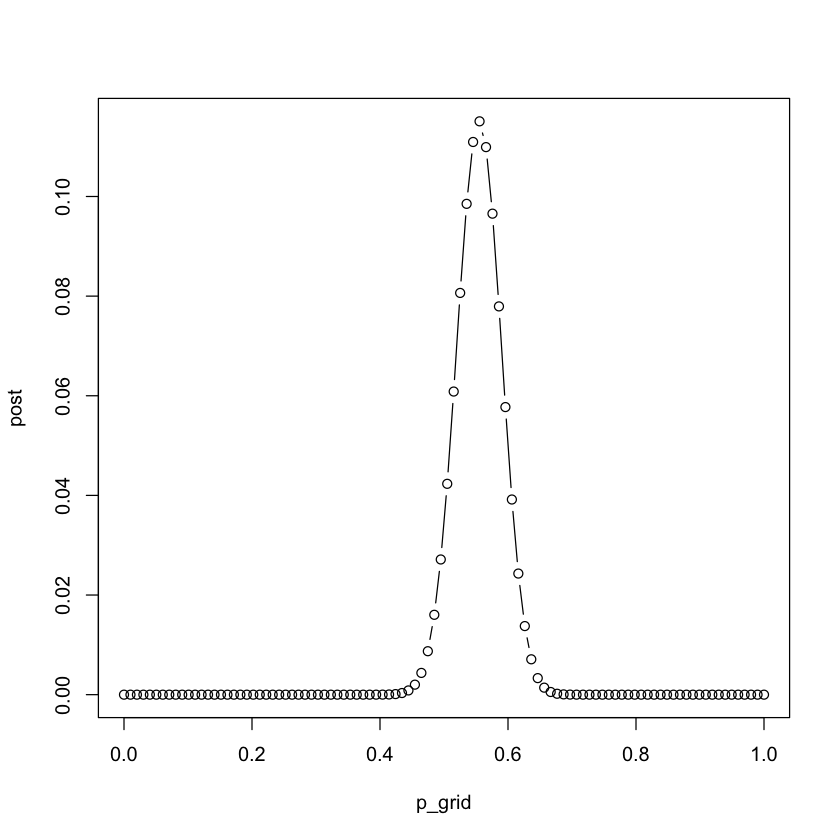

In [264]:
plot(p_grid, post, type='b')

In [265]:
p_grid[which.max(post)] #map

[1] 0.5555556

### 3H2.
Using the sample function, draw 10,000 random parameter values from the posterior distribution you calculated above. Use these samples to estimate the 50%, 89%, and 97% highest posterior
density intervals.

In [266]:
samples_3h2 = sample(p_grid, prob = post, size = 1e5, replace=TRUE)

In [267]:
HPDI(samples_3h2, c(0.5, 0.89, 0.97))

|0.97     |0.89      |0.5      0.5|     0.89|     0.97| 
0.4848485 0.4949495 0.5454545 0.5858586 0.6060606 0.6262626

### 3H3.
Use rbinom to simulate 10,000 replicates of 200 births. You should end up with 10,000 numbers, each one a count of boys out of 200 births. Compare the distribution of predicted numbers
of boys to the actual count in the data (111 boys out of 200 births). There are many good ways to
visualize the simulations, but the dens command (part of the rethinking package) is probably the
easiest way in this case. Does it look like the model fits the data well? That is, does the distribution
of predictions include the actual observation as a central, likely outcome?

In [275]:
sim = rbinom(1e4, size = 200, prob = samples_3h2)

In [276]:
length(sim)

[1] 10000

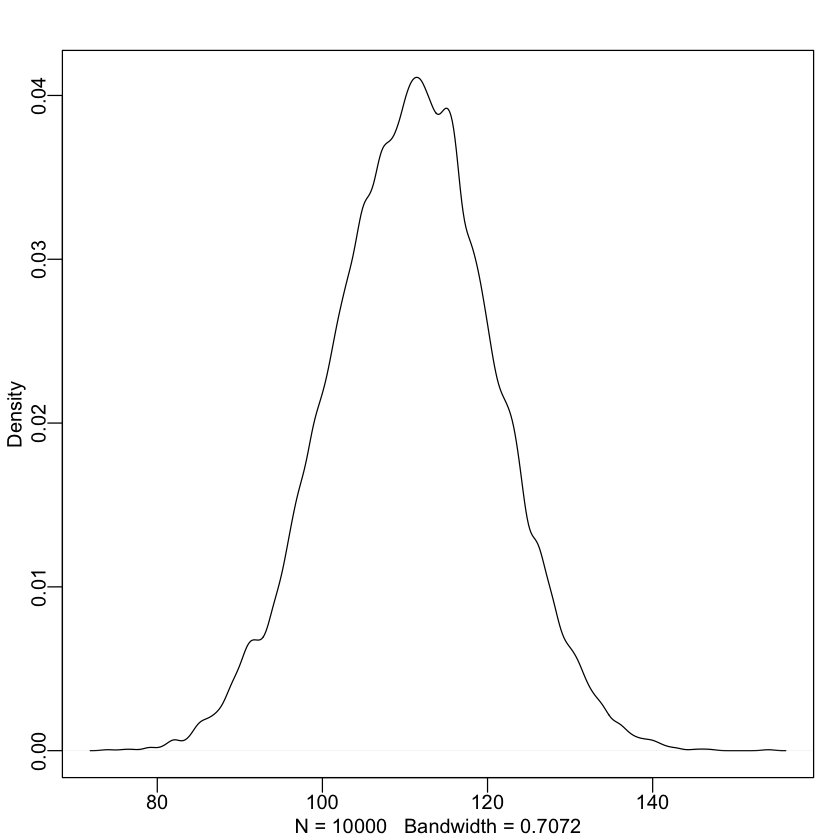

In [278]:
dens(sim)

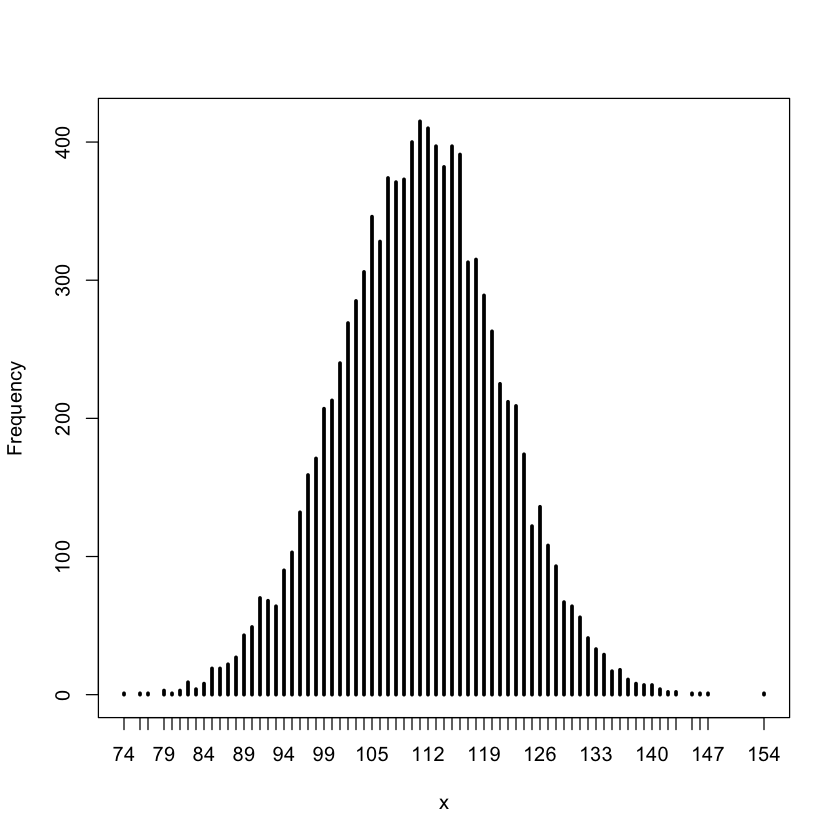

In [279]:
simplehist(sim)

it looks like we are peaking at the 111 ish number of births, so the distribution of the prediction does look like it fits well

### 3H4.
Now compare 10,000 counts of boys from 100 simulated first borns only to the number of boys
in the first births, birth1. How does the model look in this light?

Repeat the whole thing only using the first borns. In this case we will just use Python and see that notebook for details

### 3H5.
The model assumes that sex of first and second births are independent. To check this assumption, focus now on second births that followed female first borns. Compare 10,000 simulated counts
of boys to only those second births that followed girls. To do this correctly, you need to count the
number of first borns who were girls and simulate that many births, 10,000 times. Compare the
counts of boys in your simulations to the actual observed count of boys following girls. How does the
model look in this light? Any guesses what is going on in these data?